In [1]:
# Plot identify and plot commonly amplified genes.
# Prerequisites: requires that you identify amplified intervals and genes on those intervals.
# Lots of code example from https://randyzwitch.com/creating-stacked-bar-chart-seaborn/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import os
import re
import sys

pd.set_option('display.max_rows', None)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = (6,8)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['svg.fonttype'] = 'none'

sys.path.append(os.path.abspath( '/mnt/c/Users/ochapman/Documents/Mesirov/Software/oscutils'))
import get
#os.chdir('/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/amplified-intervals-bed')
os.mkdir('out')

# Cohort

In [3]:
def map_cbtn_samples():
    df = get.medullo_samples()
    df=df[df.index.map(lambda x: str(x).startswith('BS'))]
    d = df.Aliases.to_dict()
    d = {v: k for k, v in d.items()}
    return d

def map_sj_samples():
    df = get.medullo_samples()
    df = df[df.index.map(lambda x: str(x).startswith('SJ'))]
    d = df.Patient_ID.to_dict()
    return d

def read_amp_hg38(file):
    '''
    '''
    d = map_cbtn_samples()
    df = pd.read_table(file)
    df['patient_name'] = df.sample_name.map(lambda x: x.split('/')[2])
    df['sample_name'] = df.sample_name.map(lambda x: x.split('/')[3])
    df['sample_name'] = df.sample_name.map(lambda x: d[x.split('_')[0]] if x.split('_')[0] in d.keys() else x)
    #df = df[df.patient_name != 'case11'] 
    sample_drop_list=[ # keep only latest sample from each patient
        'BS_6D37YSGS',
        'BS_K07KNTFY',
        'BS_H174820R',
        'BS_ZVM1B6BF',
        'BS_WY5KYSHJ',
        'BS_ZR75EKKX',
        'BS_HZNKSQ17',
        'BS_BX8AR74E',
        'BS_CKX0R5FN',
        'BS_RENPFFNK',
        'BS_06GEF6DB',
        'BS_W37QBA12',
        'BS_2J4FG4HV'
    ]
    df = df[~df.sample_name.isin(sample_drop_list)]
    # format patient names
    df['patient_name'] = df.patient_name.map(lambda x: 'RCMB56' if x == 'case11' else x)
    d = map_sj_samples()
    df['patient_name'] = df.patient_name.map(lambda x: d[x] if x in d.keys() else x)
    return df

def read_amp_hg19(file):
    '''
    '''
    df = pd.read_table(file)
    df['patient_name'] = df.sample_name.map(lambda x: x.split('/')[2])
    return df

def load_metadata():
    df = get.medullo_patients()
    df['Subgroup'] = df['Subgroup'].fillna('Unknown')
    d = df.Subgroup.to_dict()
    return d

def get_cohort_genes():
    data_prefix='/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/data/AmpliconClassifier/cohort'
    df = pd.DataFrame()
    build='hg19'
    file = f'{data_prefix}/cohort_{build}_gene_list.tsv'
    hg19 = read_amp_hg19(file)
    build='hg38'
    file = f'{data_prefix}/cohort_{build}_gene_list.tsv'
    hg38 = read_amp_hg38(file)
    df = pd.concat([hg19,hg38])
    df = df[['feature','gene','patient_name']]
    
    df = df[df.feature.map(lambda x: x.startswith('ecDNA'))] # get only ecDNA
    # get subgroups
    d = load_metadata()
    df['Subgroup'] = df.patient_name.map(lambda x: d[x])
    
    return df.drop_duplicates()

df = get_cohort_genes()

In [4]:
subgroups = [
    #'WNT',
    'SHH',
    'G3',
    'G4',
    'Unknown'
]

genes_of_interest = [
    'MYCN',
    'MYC',
    #'PVT1',
    'CCND2',
    'TERT',
    'PPM1D',
    'ACVR2B',
    #'BCAS3',
    #'CLTC',
    'GLI2',
    'RAD51AP1',
    #'KCNA1',
    #'AKAP9',
    'CDK14',
    'CDK6',
    #'HEPACAM2',
    'DYRK4',
    #'RAD51C',
    #'PPIE',
    'MYCL1',
    #'MAPK7',
    #'EPN2',
    'RAD21',
    #'ZC3H3',
    #'SRI',
    'FOXM1',
    #'RAD52',
    #'BRD9',
    #'YBX1',
    #'CCN4',
    'SETBP1',
    #'FOXO3B',
    #'RAD51AP2',
    'SMAD2',
    'SMAD4',
    #'TOP3A',
]

In [5]:
ct = pd.crosstab(df.gene, df.Subgroup)
ct['Total'] = ct.apply(sum,axis='columns')
ct.sort_values('Total',ascending=False,inplace=True)
ct

Subgroup,G3,G4,SHH,Unknown,Total
gene,,,,,
MYCNOS,3,9,5,2,19
MYCN,3,9,5,2,19
DDX1,1,4,4,2,11
MYC,9,0,1,1,11
MYCNUT,1,6,2,2,11
NBAS,1,4,3,2,10
GACAT3,1,5,2,1,9
PVT1,8,0,0,1,9
POU5F1B,8,0,0,1,9


In [6]:
ct = ct.loc[genes_of_interest,]
ct.index.rename('Gene',inplace=True)
ct = ct.sort_values(by=['Total','Gene'],ascending=[False,True])
colors = {
    #'WNT':'blue',
    'SHH':'red',
    'G3':'yellow',
    'G4':'green',
    'Unknown':'grey'
}

In [7]:
ct

Subgroup,G3,G4,SHH,Unknown,Total
Gene,,,,,
MYCN,3,9,5,2,19
MYC,9,0,1,1,11
CCND2,0,0,3,2,5
GLI2,0,0,2,2,4
PPM1D,0,0,4,0,4
CDK14,0,3,0,0,3
CDK6,0,3,0,0,3
FOXM1,0,0,2,1,3
MYCL1,0,0,3,0,3


In [16]:
def stacked_barplot(svgfile):
    # legend
    l = plt.legend([plt.Rectangle((0,0),1,1,fc=colors[s],edgecolor='none') for s in subgroups],
                  subgroups, loc='upper right',frameon=False,ncol=1,prop={'size':14})
    # plot
    p=recursive_stacked_barplot(subgroups)
    # axes
    sns.despine(left=True)
    p.set_xticklabels(p.get_xticklabels(), rotation=-45,horizontalalignment='left',rotation_mode="anchor")
    p.set_xlabel("ecDNA-amplified genes")
    p.set_ylabel("# Affected cases")
    p.set_ylim(0,20)
    p.set_yticks(range(0,20,5))
    for item in ([p.xaxis.label, p.yaxis.label] +
             p.get_xticklabels() + p.get_yticklabels()):
        item.set_fontsize(14)
    # save
    plt.savefig(svgfile)


def recursive_stacked_barplot(cats):
    if len(cats) == 0:
        pass
    else:
        # make barplot
        df = ct[cats]
        y = df.apply(sum,axis='columns')
        p=sns.barplot(x = df.index, y=y, color=colors[cats[-1]])
        # recurse
        recursive_stacked_barplot(cats[:-1])
        return p
    


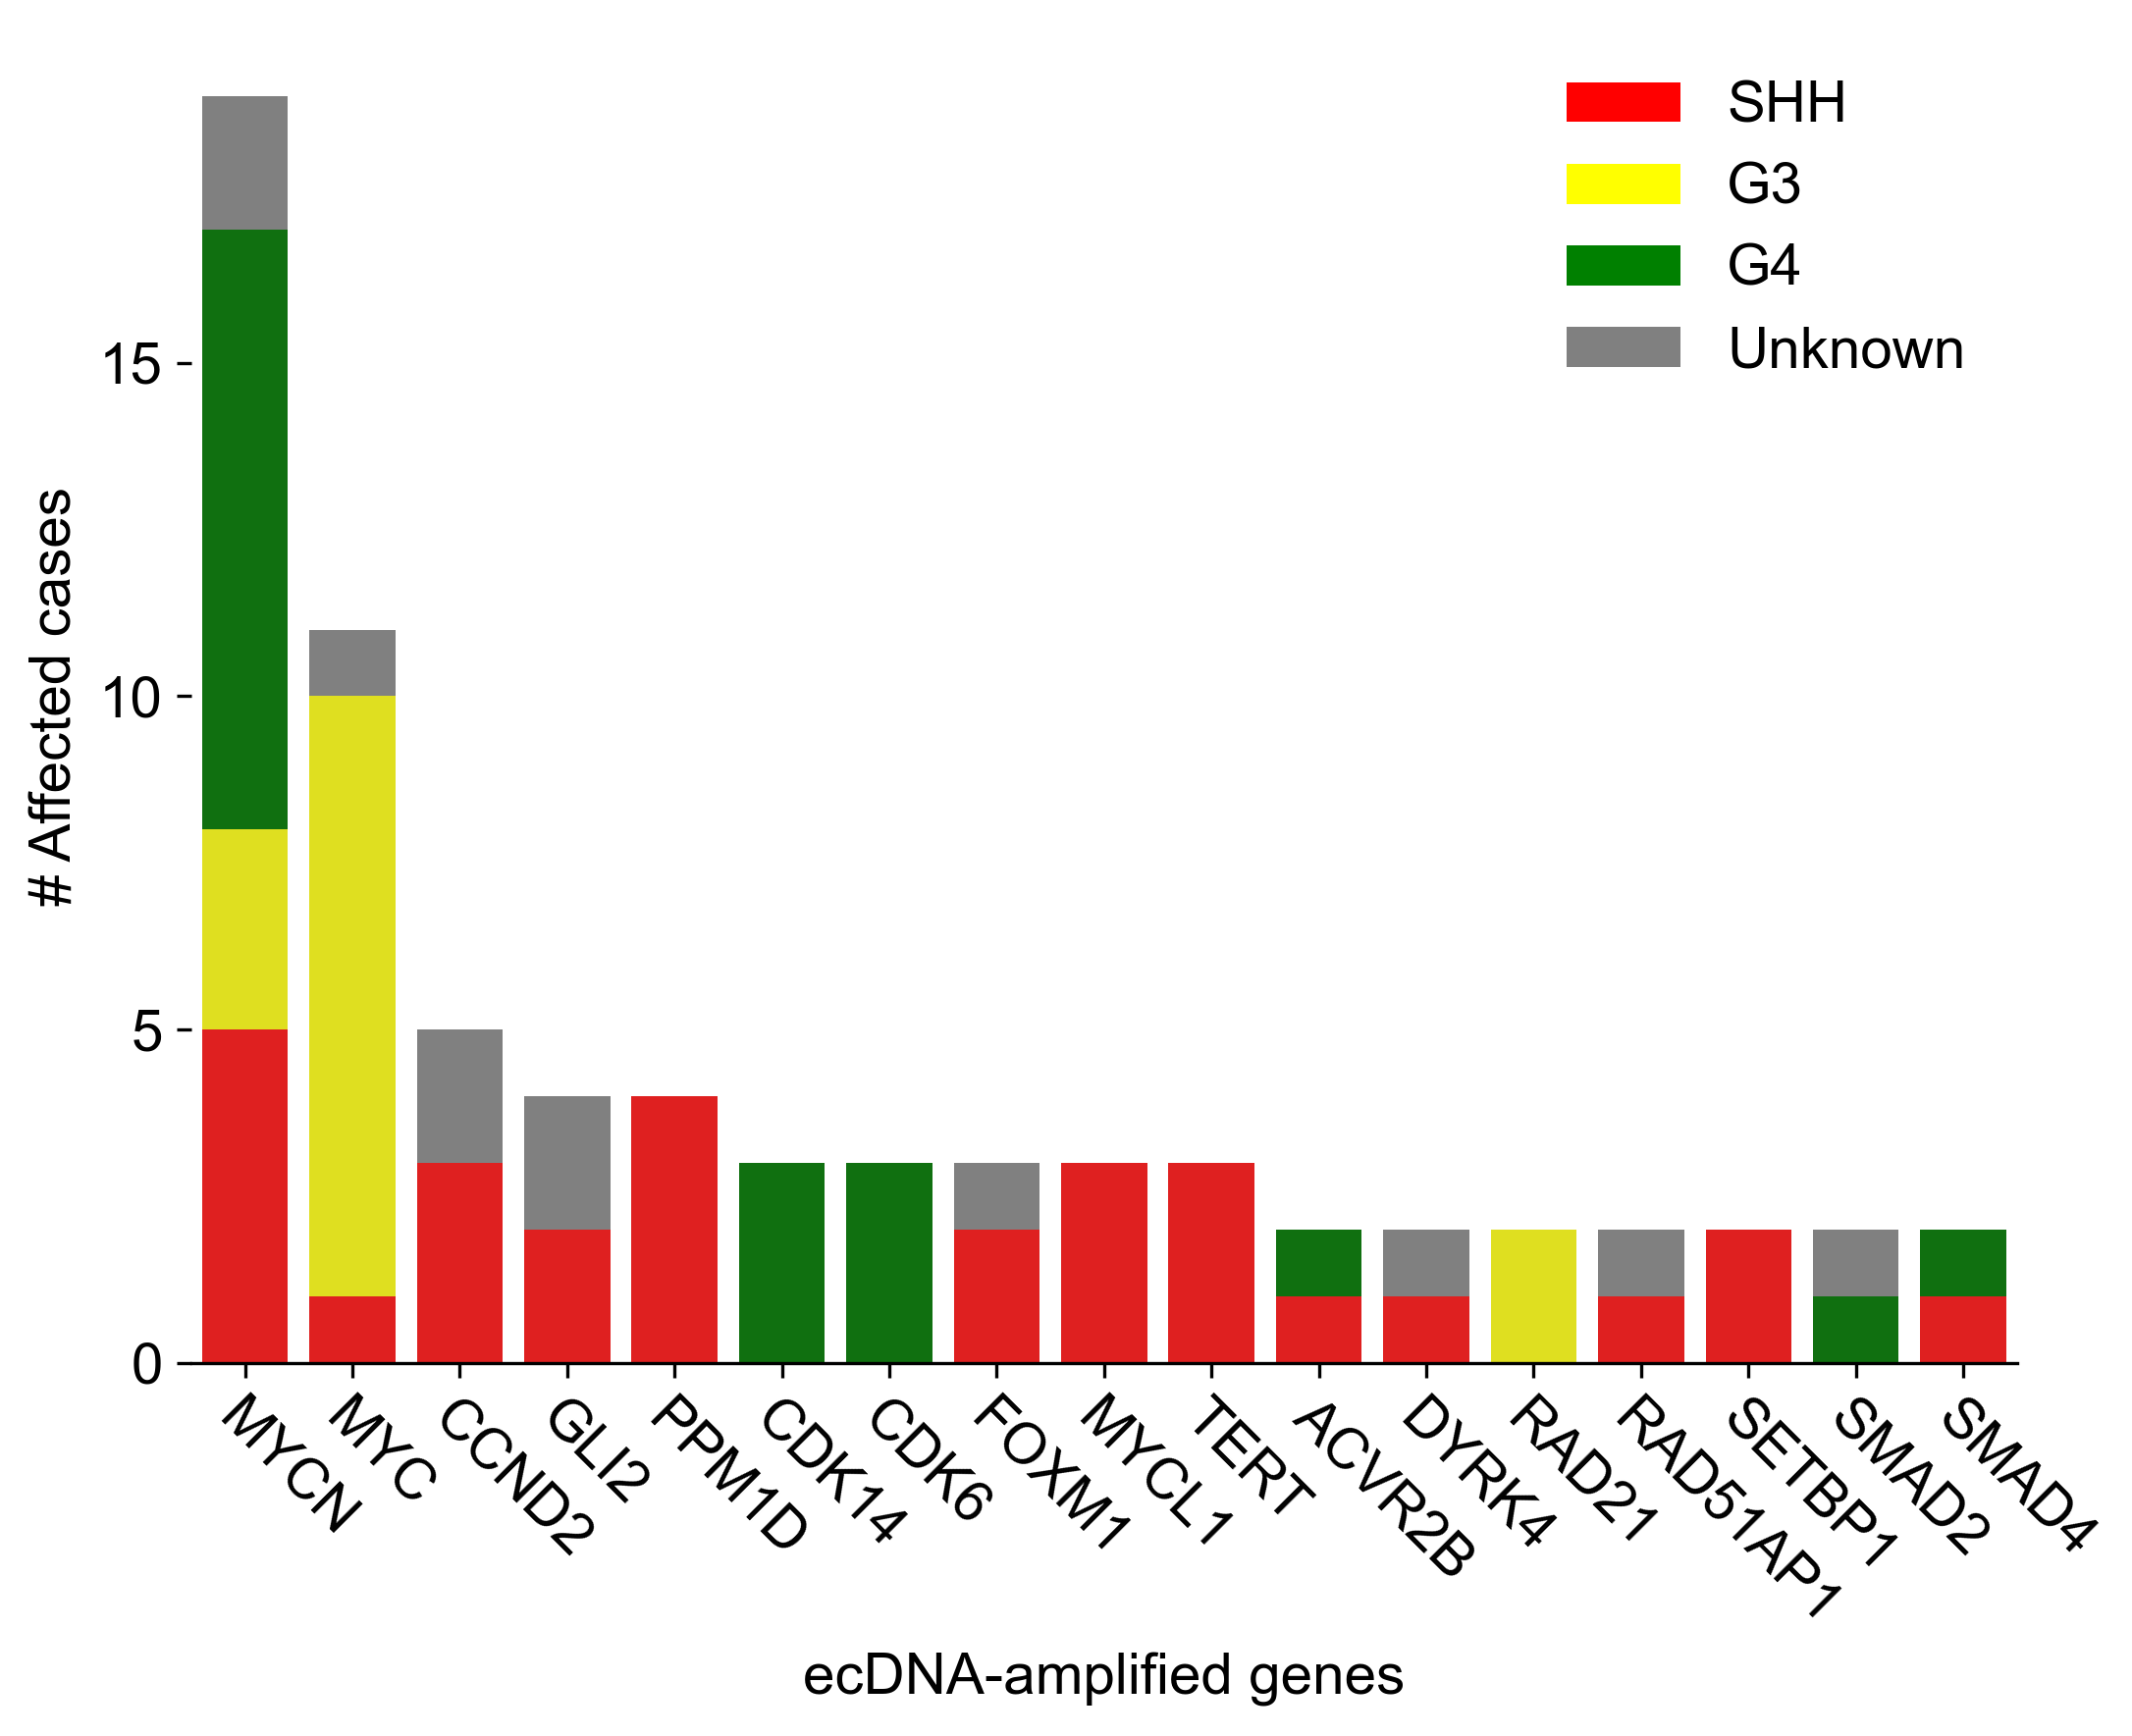

In [23]:
# Plot
#plt.figure(figsize=(6,8))
#sns.barplot(y=pdx.index,x=pdx,orient='h')
#pdx
sns.set_context({"figure.figsize": (8, 6)})
stacked_barplot("out/F1-3_amplified_genes.svg")

# All Models

# PDX

In [3]:
subgroups = [
    'SHH',
    'SHH-TP53',
    'G3',
    'G4',
]
def load_metadata():
    metadata_file = '/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/Table 2 ecDNA in PDX models.xlsx'
    df = pd.read_excel(metadata_file,index_col="Sample_id")
    df['Subgroup'] = df['Subgroup'].fillna('Unknown')
    return df
def get_pdx_genes():
    pdxdir='/mnt/c/Users/ochapman/Documents/Mesirov/medullo_ecDNA/amplified-intervals-bed/pdx-genes'
    genedict={}
    for file in os.listdir(pdxdir):
        if not file.endswith('.bed'):
            continue
        # Get subgroup
        name = re.split(r'(_\d)?\..*\.bed',file)[0]
        assert (name in meta.index), name
        
        subgroup = meta.loc[name,'Subgroup']
        # Get genes
        file = os.path.join(pdxdir,file)
        with open(file) as f:
            for line in f:
                line=line.split()[3]
                if not line in genedict.keys():
                    genedict[line] = dict([(s,0) for s in subgroups])
                genedict[line][subgroup]+=1
    return genedict
meta = load_metadata()
pdx_dict = get_pdx_genes()

In [4]:
pdx_df = pd.DataFrame(pdx_dict).transpose()
pdx_df['Total'] = pdx_df.apply(sum,axis='columns')
pdx_df.sort_values('Total',ascending=False,inplace=True)
pdx_df.to_csv('gene_amplification_counts_pdx.tsv',sep='\t')

In [10]:
genes_of_interest = [
    'MYCN',
    'MYC',
    #'PVT1',
    'OTX2',
    'GLI1',
    'GLI2',
    'CDK4',
    'CCND2',
    'TCF3',
    #'AKAP9',
    'CDK6',
    #'KMT2A',
    'YAP1',
    'BIRC3',
    'MYCBP',
    'MYCL',
    'KDM5B',
    'FOXO6',
    'SOX13',
    'MDM4',
    'KMT2E',
]

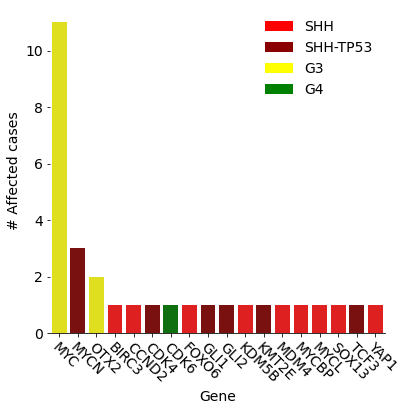

In [11]:
ct = pdx_df.loc[genes_of_interest,]
ct.index.rename('Gene',inplace=True)
ct = ct.sort_values(by=['Total','Gene'],ascending=[False,True])
colors = {
    'SHH':'red',
    'SHH-TP53':'darkred',
    'G3':'yellow',
    'G4':'green',
}
sns.set_context({"figure.figsize": (6, 6)})
stacked_barplot("F2-1_amplified_genes_pdx.svg")

In [9]:
meta

,Sample_type,Subgroup,ecDNA,ecDNA Genes,Origin,dnam_high_cn,Gender
Sample_id,,,,,,,
D341,Cell-line,G3,yes,MYC,"Bagchi Lab, Rich Lab",NaN,NaN
D425,Cell-line,G3,yes,MYC,Bagchi Lab,NaN,NaN
D458,Cell-line,G3,yes,MYC,"Bagchi Lab, Rich Lab",NaN,NaN
MB002,PDX,G3,yes,MYC,"Jae Cho, Stanford University",NaN,NaN
MB009,PDX,G3,yes,MYC,"Robert Wechsler-Reya, SBP",NaN,F
Med211FH,PDX,G3,yes,MYC,"J. Olson Lab, Fred Hutchinson",NaN,M
Med1911FH,PDX,G3,yes,MYC,"Olson, RWR",NaN,F
Med411FH,PDX,G3,yes,MYC,"J. Olson Lab, Fred Hutchinson",NaN,F
Med511FH,PDX,G3,yes,MYC,"J. Olson Lab, Fred Hutchinson",NaN,NaN
